In [27]:
import numpy as np
import pandas as pd

In [28]:
data = pd.read_csv("mpg.csv")

In [29]:
data = data[data.horsepower != "?"]

In [30]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [31]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
from sklearn.model_selection import train_test_split
df=data
training_features = [ 'acceleration','origin','displacement','model_year','horsepower']
target = 'mpg'

X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.10, random_state=20)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100)

#n_estimators here mean weak learners that will be clubbed into one strong model
# but instead of using the normal approach the resultant storng model will be arrived at
# by gradient updatation at each iteration.

In [35]:
model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [36]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

#we should get a better rsquare value than adaboost

Mean squared error: 2.47
R Square score: 0.97


[Text(167.4, 190.26, 'X[2] <= 190.5\nmse = 73.091\nsamples = 352\nvalue = 25.09'),
 Text(83.7, 135.9, 'X[3] <= 77.5\nmse = 44.217\nsamples = 222\nvalue = 29.742'),
 Text(41.85, 81.53999999999999, 'X[4] <= 96.5\nmse = 18.994\nsamples = 91\nvalue = 25.011'),
 Text(20.925, 27.180000000000007, 'mse = 14.772\nsamples = 76\nvalue = 26.105'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 3.582\nsamples = 15\nvalue = 19.467'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 97.5\nmse = 35.385\nsamples = 131\nvalue = 33.029'),
 Text(104.625, 27.180000000000007, 'mse = 37.117\nsamples = 41\nvalue = 38.066'),
 Text(146.475, 27.180000000000007, 'mse = 17.774\nsamples = 90\nvalue = 30.734'),
 Text(251.10000000000002, 135.9, 'X[4] <= 127.0\nmse = 22.32\nsamples = 130\nvalue = 17.145'),
 Text(209.25, 81.53999999999999, 'X[3] <= 81.5\nmse = 16.746\nsamples = 65\nvalue = 20.392'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 7.327\nsamples = 57\nvalue = 19.605'),
 Text(230.175, 27.

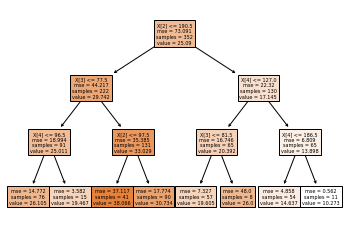

In [26]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[2],filled=True)

#reduce depth to get a clear picture with values
# model.estimators_[i] here i can be 0 to 21 since we have 22 estimators